# **Predicting House Sale Price in King County in 2015**

It is currently the year **2015**. Lucas, a longtime resident of Singapore, has recently received a job offer in Bellevue, Washington. This has prompted him to plan a move to King County with his entire family.

Unfamiliar with the U.S. housing market due to his limited travel outside of Asia, Lucas is seeking guidance from us, data analysts, to give him useful suggestions and recommendations in buying a suitable house in King County at a reasonable price.

> ***OUR AIM:***    
*To provide Lucas with valuable insights into King County's housing market. We will achieve this through `exploratory data analysis (EDA)` of a relevant King County housing dataset. Additionally, we will leverage various `machine learning models` by training and tuning them to predict house sale prices based on Lucas' specific requirements.*

---

**Import Essential Libraries**

In [119]:
# libraries used for visualizations and cleaning of data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
sb.set()

# libraries used to train and evaluate different regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Information**

The `kc_house_data` dataset was obtained from kaggle from the following link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data

This dataset contains house sale prices in King County, particularly houses sold from May 2014 to May 2015. It contains information on the houses sold such as the number of bedrooms, bathrooms, year it was built, year it was renovated etc.

In [181]:
rawData = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")
rawData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Data Description:**

> `id`:  Unique ID per house sale   
`date`: Date of the house sale   
`price`: Price of house sale in USD   
`bedrooms`: Number of bedrooms    
`bathrooms`: Number of bathrooms   
`sqft_living`: Square footage of the apartments interior living space   
`sqft_lot`: Square footage of the land space   
`floors`: Number of floors   
`waterfront`: An index to indicate if the house was overloofing the waterfront or not *(0 represents no waterfront, 1 represents with waterfront)*   
`view`: An index from 0 to 4 indicating of how good the view of the property was *(0 represents no good view, 4 represents very good view)*   
`condition`: An index from 1 to 5 on the condition of the house *(1 represents very poor condition, 5 represents very good condition)*   
`grade`: An index from 1 to 13 on the construction of the property *(1 to 3 falls short of building construction and design, 7 has an average level of construction and design, and 11 to 13 have higher quality level of construction and design)*   
`sqft_above`: The square footage of the interior housing space that is above the ground level   
`sqft_basement`: The square footage of the interior housing space that is below the ground level   
`yr_built`: The year of house built   
`yr_renovated`: The year of the house’s last renovation   
`zipcode`: The zipcode is the postal code to indicate the area the house is in   
`lat`: Latitude   
`long`:	Longitude   
`sqft_living15`: The average square footage of interior housing living space for the nearest 15 neighboring houses   
`sqft_lot 15`: The average square footage of land space for the nearest 15 neighboring houses



In [182]:
print('Shape of original dataset: ', rawData.shape)

Shape of original dataset:  (21613, 21)


---
# **Exploratory Data Analysis**

To gain some general insights from the original King County dataset, we will be plotting various charts and analyse the outputs.



### **Line Charts**


#### **Trend of Average House Sale Price in King County Based On** ***Year Built***

According to `Investopedia`, **building age** is one of the common factors that affects house price. Hence, in order to find out how house sale prices changes based on when it was built, the line chart below was built. This chart shows the trend of average house sale price against year it was built.

Link: https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp




In [122]:
#prepare the average prices column for year built
average_prices = rawData.groupby('yr_built')['price'].mean().reset_index()
average_prices

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444
...,...,...
111,2011,544522.000000
112,2012,527447.335294
113,2013,678545.452736
114,2014,683681.754919


In [123]:
fig = px.line(average_prices, x="yr_built", y="price")

# Define custom hover template
hover_template = "Year Built: %{x}<br>" \
                 "Avg. House Sale Price: %{y:.2f}k"

# Update layout
layout = dict(
    title='<b>Trend of Average House Sale Price in King County Based on Year It Was Built (1900-2015)\n</b>',
    xaxis=dict(
        title='<b>Year Built</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    yaxis=dict(
        title='<b>Average Price</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    title_x=0.5,  # Center-align the title horizontally
    title_y=0.95,   # Position the title closer to the top
)

# Update figure with custom hover template and layout
fig.update_traces(hovertemplate=hover_template)
fig.update_layout(layout)

# Divide the house price by 1000 to display in thousands
fig.data[0].update(y=fig.data[0].y / 1000)

fig.show()


The above chart shows that houses that are **very old or very new** are generally **more expensive** ranging from 580k to 760k. Houses built from 1940 to 1982 seem to be comparatively cheaper ranging from 330k to 560k.

#### **Trend of Average House Sale Price in King County Based On** ***Month Sold***

We wanted to learn if there was **a specific season or a period of time** where house sale price might be cheaper. Hence, the below line chart was done to see how the house sale prices change based on the months they were built.

In [124]:
df=rawData.copy()
df['date'] = df['date'].astype('datetime64[ns]')
df['month'] = df['date'].apply(lambda x: x.month)
avg_price_month = df.groupby('month')['price'].mean().reset_index()
avg_price_month

,month,price
0,1,525870.889571
1,2,507851.371200
2,3,543977.187200
3,4,561837.774989
4,5,550768.785833
5,6,558002.199541
6,7,544788.764360
7,8,536445.276804
8,9,529253.821871
9,10,539026.971778


In [125]:
fig = px.line(avg_price_month, x="month", y="price")

# Define custom hover template
hover_template = "Month: %{x}<br>" \
                 "Avg. House Sale Price: %{y:.2f}k"

# Update layout
layout = dict(
    title='<b>Trend of Average House Sale Price in King County Based on Month It Was Sold\n</b>',
    xaxis=dict(
        title='<b>Month</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12),  # Set font size
        tickvals=list(range(1, 13)),  # Set tick values to represent months from 1 to 12
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],  # Set tick text for abbreviated month names
    ),
    yaxis=dict(
        title='<b>Average Price</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    title_x=0.5,  # Center-align the title horizontally
    title_y=0.95,   # Position the title closer to the top
)

# Update figure with custom hover template and layout
fig.update_traces(hovertemplate=hover_template, mode='lines+markers')
fig.update_layout(layout)

# Divide the house price by 1000 to display in thousands
fig.data[0].update(y=fig.data[0].y / 1000)

fig.show()


Based on the line chart above, late winter and early summer period spanning from **March to July** generally have **more expensive house** sale prices ranging from 543k to 560k. For **cheaper options** ranging from 507k to 540k, buying houses during winter from months **September to February** could be considered.

### **Correlation Heatmap**

#### **Linear Relationship between Sale Price and Different Measures of Houses in King County**

According to the same `Investopedia` article, **house size** was also one of the essential factors that affects house price. Hence, in order to find out more about the relationship between house sale prices and different measurements of houses in King County, the following correlation heatmap was done.

Link: https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp


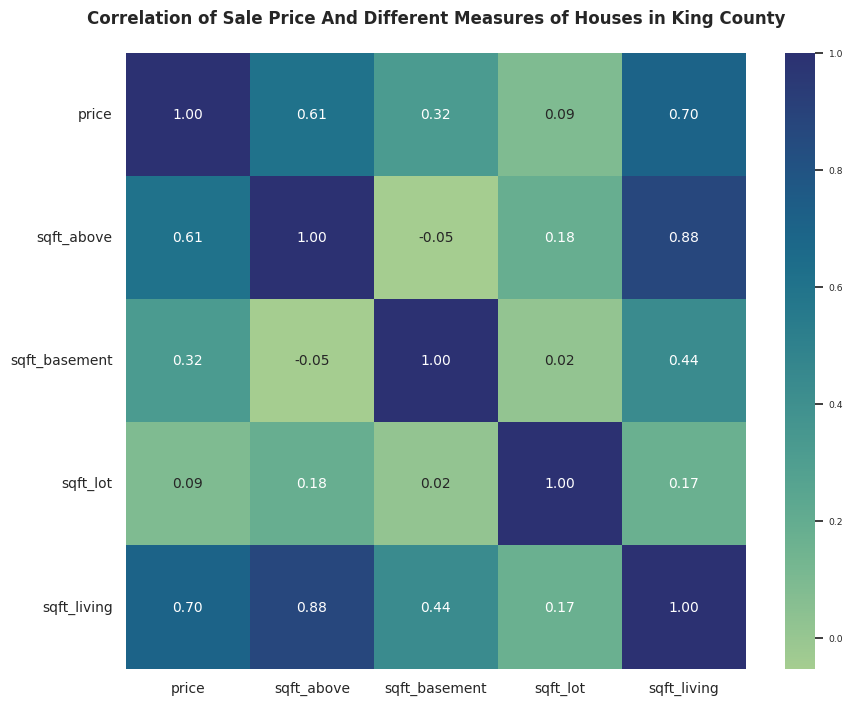

In [183]:
# Constructing the correlation matrix
colOfInterest = rawData[["price", "sqft_above", "sqft_basement", "sqft_lot","sqft_living"]]
correlation_matrix = colOfInterest.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
sb.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", annot_kws={"fontsize":10})
plt.title('Correlation of Sale Price And Different Measures of Houses in King County\n', fontweight='bold', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.show()

All the different measurements seem to generally have **high positive linear relationship** with house sale price. `sqft_living` which is the size of living space is the most correlated with a value of 0.70, followed by `sqft_above` which is the size of living space above ground level with a correlation value of 0.61. This is as expected since house prices generally increase with house size.

Although not as highly correlated as the above two, `sqft_basement`, which is the basement size, and `sqft_lot`, which is the size of land space, are also somewhat positively correlated with a value of 0.32 and 0.09 respectively.

### **Histogram**

#### **Distribution of House Sale Price in King County**

It is essential to know the **range of house sale prices** in King County so as to make more informed decisions in buying a suitable house. Therefore, the following histogram was done to see the distribution of house sale prices in King County.

In [127]:
import plotly.express as px

# Create histogram
fig = px.histogram(rawData, x="price", nbins=80)

# Define custom hover template
hover_template = "House Sale Price Range: %{x}<br>" \
                 "Avg. House Count: %{y:.0f}k"

# Update layout
layout = dict(
    title='<b>Distribution of House Sale Price in King County\n</b>',
    xaxis=dict(
        title='<b>House Sale Price</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    yaxis=dict(
        title='<b>Count</b>',  # Wrap title in <b> tags for bold
        titlefont=dict(size=12)  # Set font size
    ),
    title_x=0.5,  # Center-align the title horizontally
    title_y=0.95,   # Position the title closer to the top
    bargap=0.1,  # Adjust the gap between bars
    bargroupgap=0.1,  # Adjust the gap between groups of bars
    barmode="overlay"
)

# Update figure with custom hover template and layout
fig.update_traces(hovertemplate=hover_template,marker_color='purple', opacity=0.7, selector=dict(type='histogram'))
fig.update_layout(layout)

# Show plot
fig.show()


The distribution of house sale prices in King County is **positively skewed** based on the histogram chart above. This suggests that although there may be a few instances where sale price ranged above 7M, generally most houses are sold at prices **ranging from 100k to 1.3M**. Most frequently, houses were sold at prices ranging from 300k to 400k.


### **Scatter Map**

#### **General Trend of House Sale Price Across Various Parts of King County**

Since Lucas and family are new to U.S. and are not very familiar with the different locations in King County, our team thought that gaining knowledge on how the **house sale price varies across different locations** in King County might be useful. Hence, the following scatter map was done to obtain a clear visualization of the changing house sale prices in different parts of King County.

However, from the histogram earlier, we noticed that the outliers might hinder us from viewing the **general trend** of house prices in different parts of King County. Thus, the outliers were first removed before plotting the chart.

In [128]:
#removing outliers to display change in sale price of houses generally
df2=rawData[['price', 'long', 'lat']]

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

print(df2.shape)
df_out = df2[~((df2 < (Q1 - (1.5 * IQR))) | (df2 > (Q3 + (1.5 * IQR)))).any(axis=1)]
print(df_out.shape)

(21613, 3)
(20213, 3)


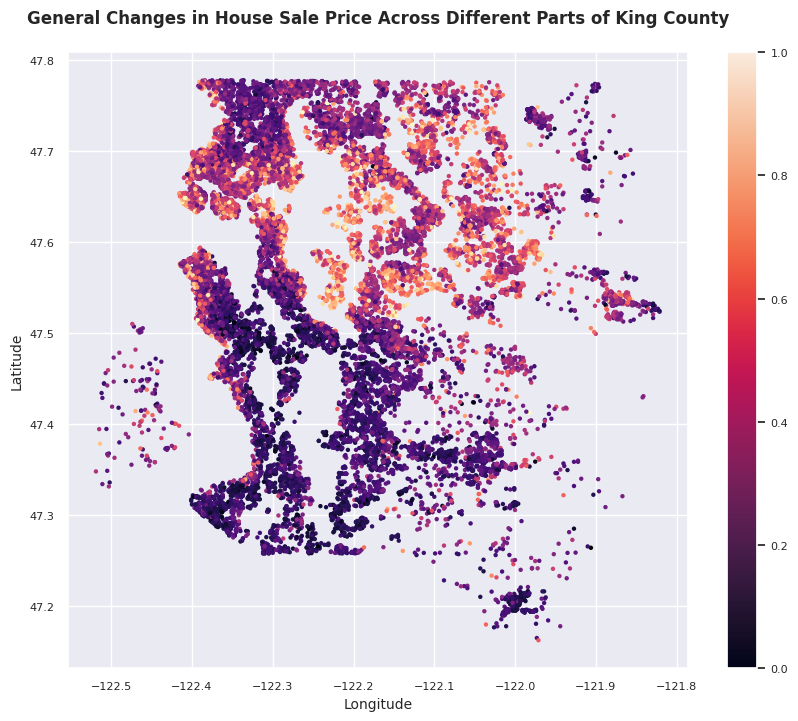

In [129]:
plt.figure(figsize=(10, 8))

# Create scatter plot
scatter = sb.scatterplot(x='long', y='lat', data=df_out, hue='price', palette='magma', legend=False, s=10, edgecolor='none')

# Adjust color bar
cbar = plt.colorbar(scatter.collections[0])
cbar.ax.tick_params(labelsize=8)

plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.title('General Changes in House Sale Price Across Different Parts of King County\n', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


When comparing the geographical map of King County with the above chart, the **South** part of King County seem to generally has **cheaper** houses while the **East** part comparatively has **more expensive** houses. Therefore, Lucas could consider buying houses in the Southern area where house sale prices are relatively cheaper.

---
# **Data Wrangling**

### **Handling Null Values**

In [194]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [195]:
rawData.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**No null values** were found.

### **Handling Outliers**

In real life, there might be cases where bigger houses might be cheaper depending on the owner. Our team would like our machine learning models to be trained to predict house sale prices for such cases as well. Hence, we decided to keep the outliers present in different measurements of houses (`sqft_living`, `sqft_above` etc.).

Whereas, for features like `bedrooms` and `bathrooms`, since our clients are only a family of 5, they do not require 30 bedrooms and 10 bathrooms. Hence, we decided to remove the outliers for these features.

Additionally, removing extreme `price` values like a few million dollars might aid our models to predict the house sale prices more accurately.

#### **Boxplots *Before* Removing Outliers**

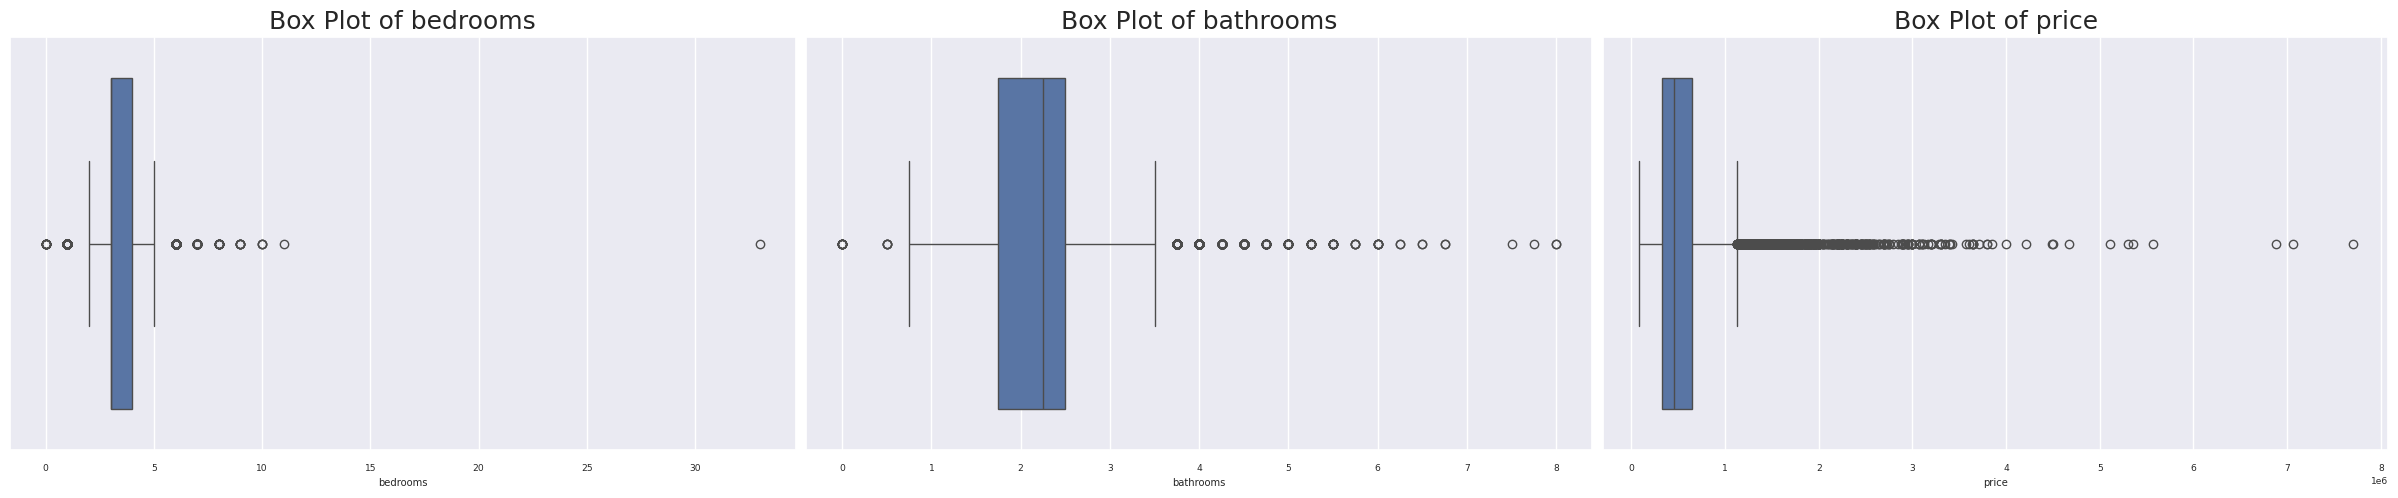

In [196]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))

columns=['bedrooms','bathrooms','price']#,'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
i=0
# Iterate through each column and populate the subplots
for col in columns:
    # Calculate the row and column index for the current subplot
    #row_index = i // 3
    #col_index = i % 3

    # Plot the box plot for the current column in the appropriate subplot
    # sb.boxplot(x=rawData[col], ax=axes[row_index, col_index])
    # axes[row_index, col_index].set_title(f'Box Plot of {col}', fontsize=18)
    sb.boxplot(x=rawData[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=18)

    # Increment the counter
    i += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Remove Outliers**

In [197]:
# Define a function to remove outliers based on a specified threshold
def remove_outliers(df, columns):
    # Copy the DataFrame to avoid modifying the original
    df_clean = df.copy()

    # Iterate over each column
    for col in columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR

        # Filter out the outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Call the function to remove outliers from the specified columns
df_cleaned = remove_outliers(rawData, columns)

# Display the cleaned DataFrame
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [198]:
print("Before cleaning, dataset shape: ", rawData.shape)
print("After cleaning, dataset shape: ", df_cleaned.shape)

Before cleaning, dataset shape:  (21613, 21)
After cleaning, dataset shape:  (20863, 21)


#### **Boxplots *After* Removing Outliers**

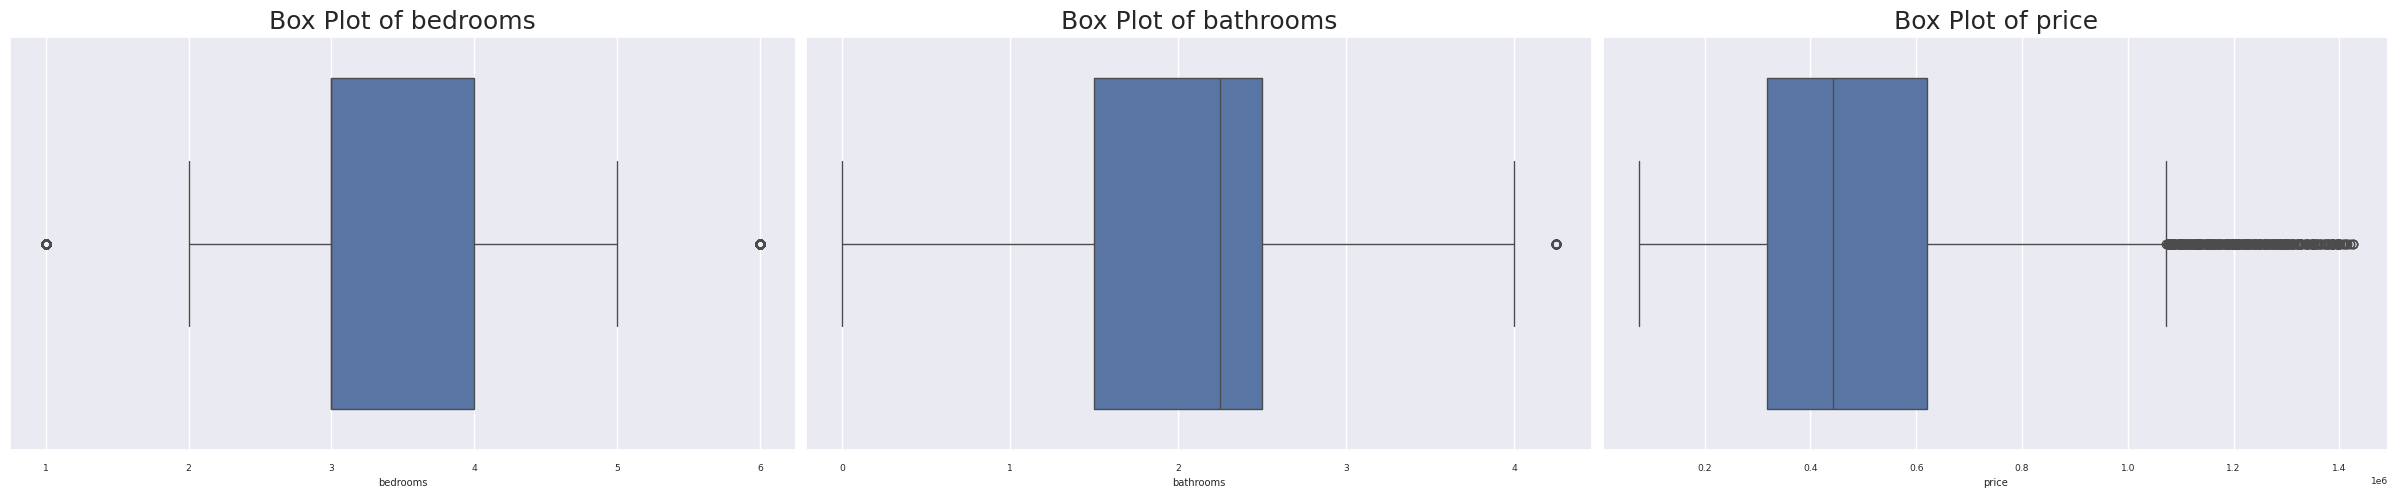

In [199]:
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

columns=['bedrooms','bathrooms','price']#'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
i=0
# Iterate through each column and populate the subplots
for col in columns:
    # Calculate the row and column index for the current subplot
    # row_index = i // 3
    # col_index = i % 3

    # Plot the box plot for the current column in the appropriate subplot
    sb.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=18)

    # Increment the counter
    i += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### **Feature Engineering**

Based on the insights gained through EDA, we decided to engineer 3 new features that might be helpful in helping to predicting the house sale price.


1. `building_age`: *Age of the property*  
Age was one of the important factors that affects house price according to article from Investopedia.
2. `yrs_since_renov`: *Number of years since last renovated*   
Renovated buildings might be more expensive.
3. `month`: *Month the house was sold*   
Based on EDA, house prices might vary during different months in a year.



In [200]:
#change the data type of date column to datetime
import datetime
df_cleaned['date'] = df_cleaned['date'].astype('datetime64[ns]')

#create three new columns storing the age of the building, number of years since renovated and number of years since it was sold
df_cleaned['building_age'] = (df_cleaned['date'].apply(lambda x: x.year) - df_cleaned['yr_built'])
df_cleaned['yrs_since_renov'] = (df_cleaned['date'].apply(lambda x: x.year) - df_cleaned['yr_renovated'])
df_cleaned['month'] = df_cleaned['date'].apply(lambda x: x.month)

#standardise values
df_cleaned['building_age'] = np.where(df_cleaned['building_age']<0, 0, df_cleaned['building_age'])
df_cleaned['yrs_since_renov'] = np.where(df_cleaned['yrs_since_renov']>2000, 0, df_cleaned['yrs_since_renov'])
df_cleaned['yrs_since_renov'] = np.where(df_cleaned['yrs_since_renov']<0, 0, df_cleaned['yrs_since_renov'])
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,building_age,yrs_since_renov,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,59,0,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,63,23,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,82,0,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,49,0,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,28,0,2


#### **Dropping Unnecessary Columns**

In [201]:
df_final = df_cleaned.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)#, 'lat', 'long'], axis=1)
df_final.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,building_age,yrs_since_renov,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,59,0,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,63,23,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,82,0,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,49,0,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,28,0,2


In [202]:
print('Original dataset shape: ', rawData.shape)
print('Final dataset shape: ', df_final.shape)

Original dataset shape:  (21613, 21)
Final dataset shape:  (20863, 19)


#### **Further Analysis on New Engineered Features**

Although the three new features were added based on external research and assumptions, it might not be useful in predicting house sale price accurately for this `kc_house_data` dataset. Therefore, further analysis on these new features are done to ensure they hold significance in predicting house sale price in this case.

**Linear Relationship Between House Sale Price With** ***Numerical Variables:***

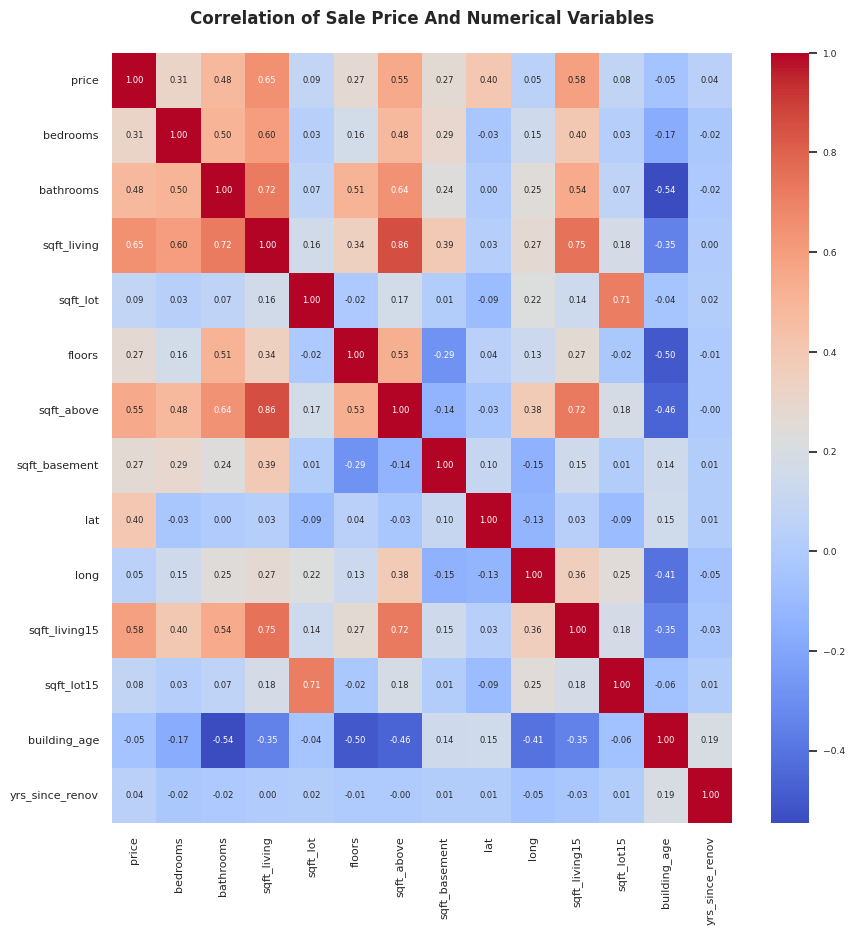

In [203]:
cor = df_final.drop(['waterfront','view','condition','grade','month'],axis=1).corr()
sb.set(font_scale=0.6)
plt.figure(figsize=(10,10))
plt.title('Correlation of Sale Price And Numerical Variables\n', fontweight='bold', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sb.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"fontsize":6})
plt.show()

Both `building_age` and `yrs_since_renov` have relatively **weak linear relationship** to `price`. While building age has negative correlation of -0.05, years since renovated has positive correlation of 0.04.

**Relationship Between House Sale Price With** ***Categorical Variables:***

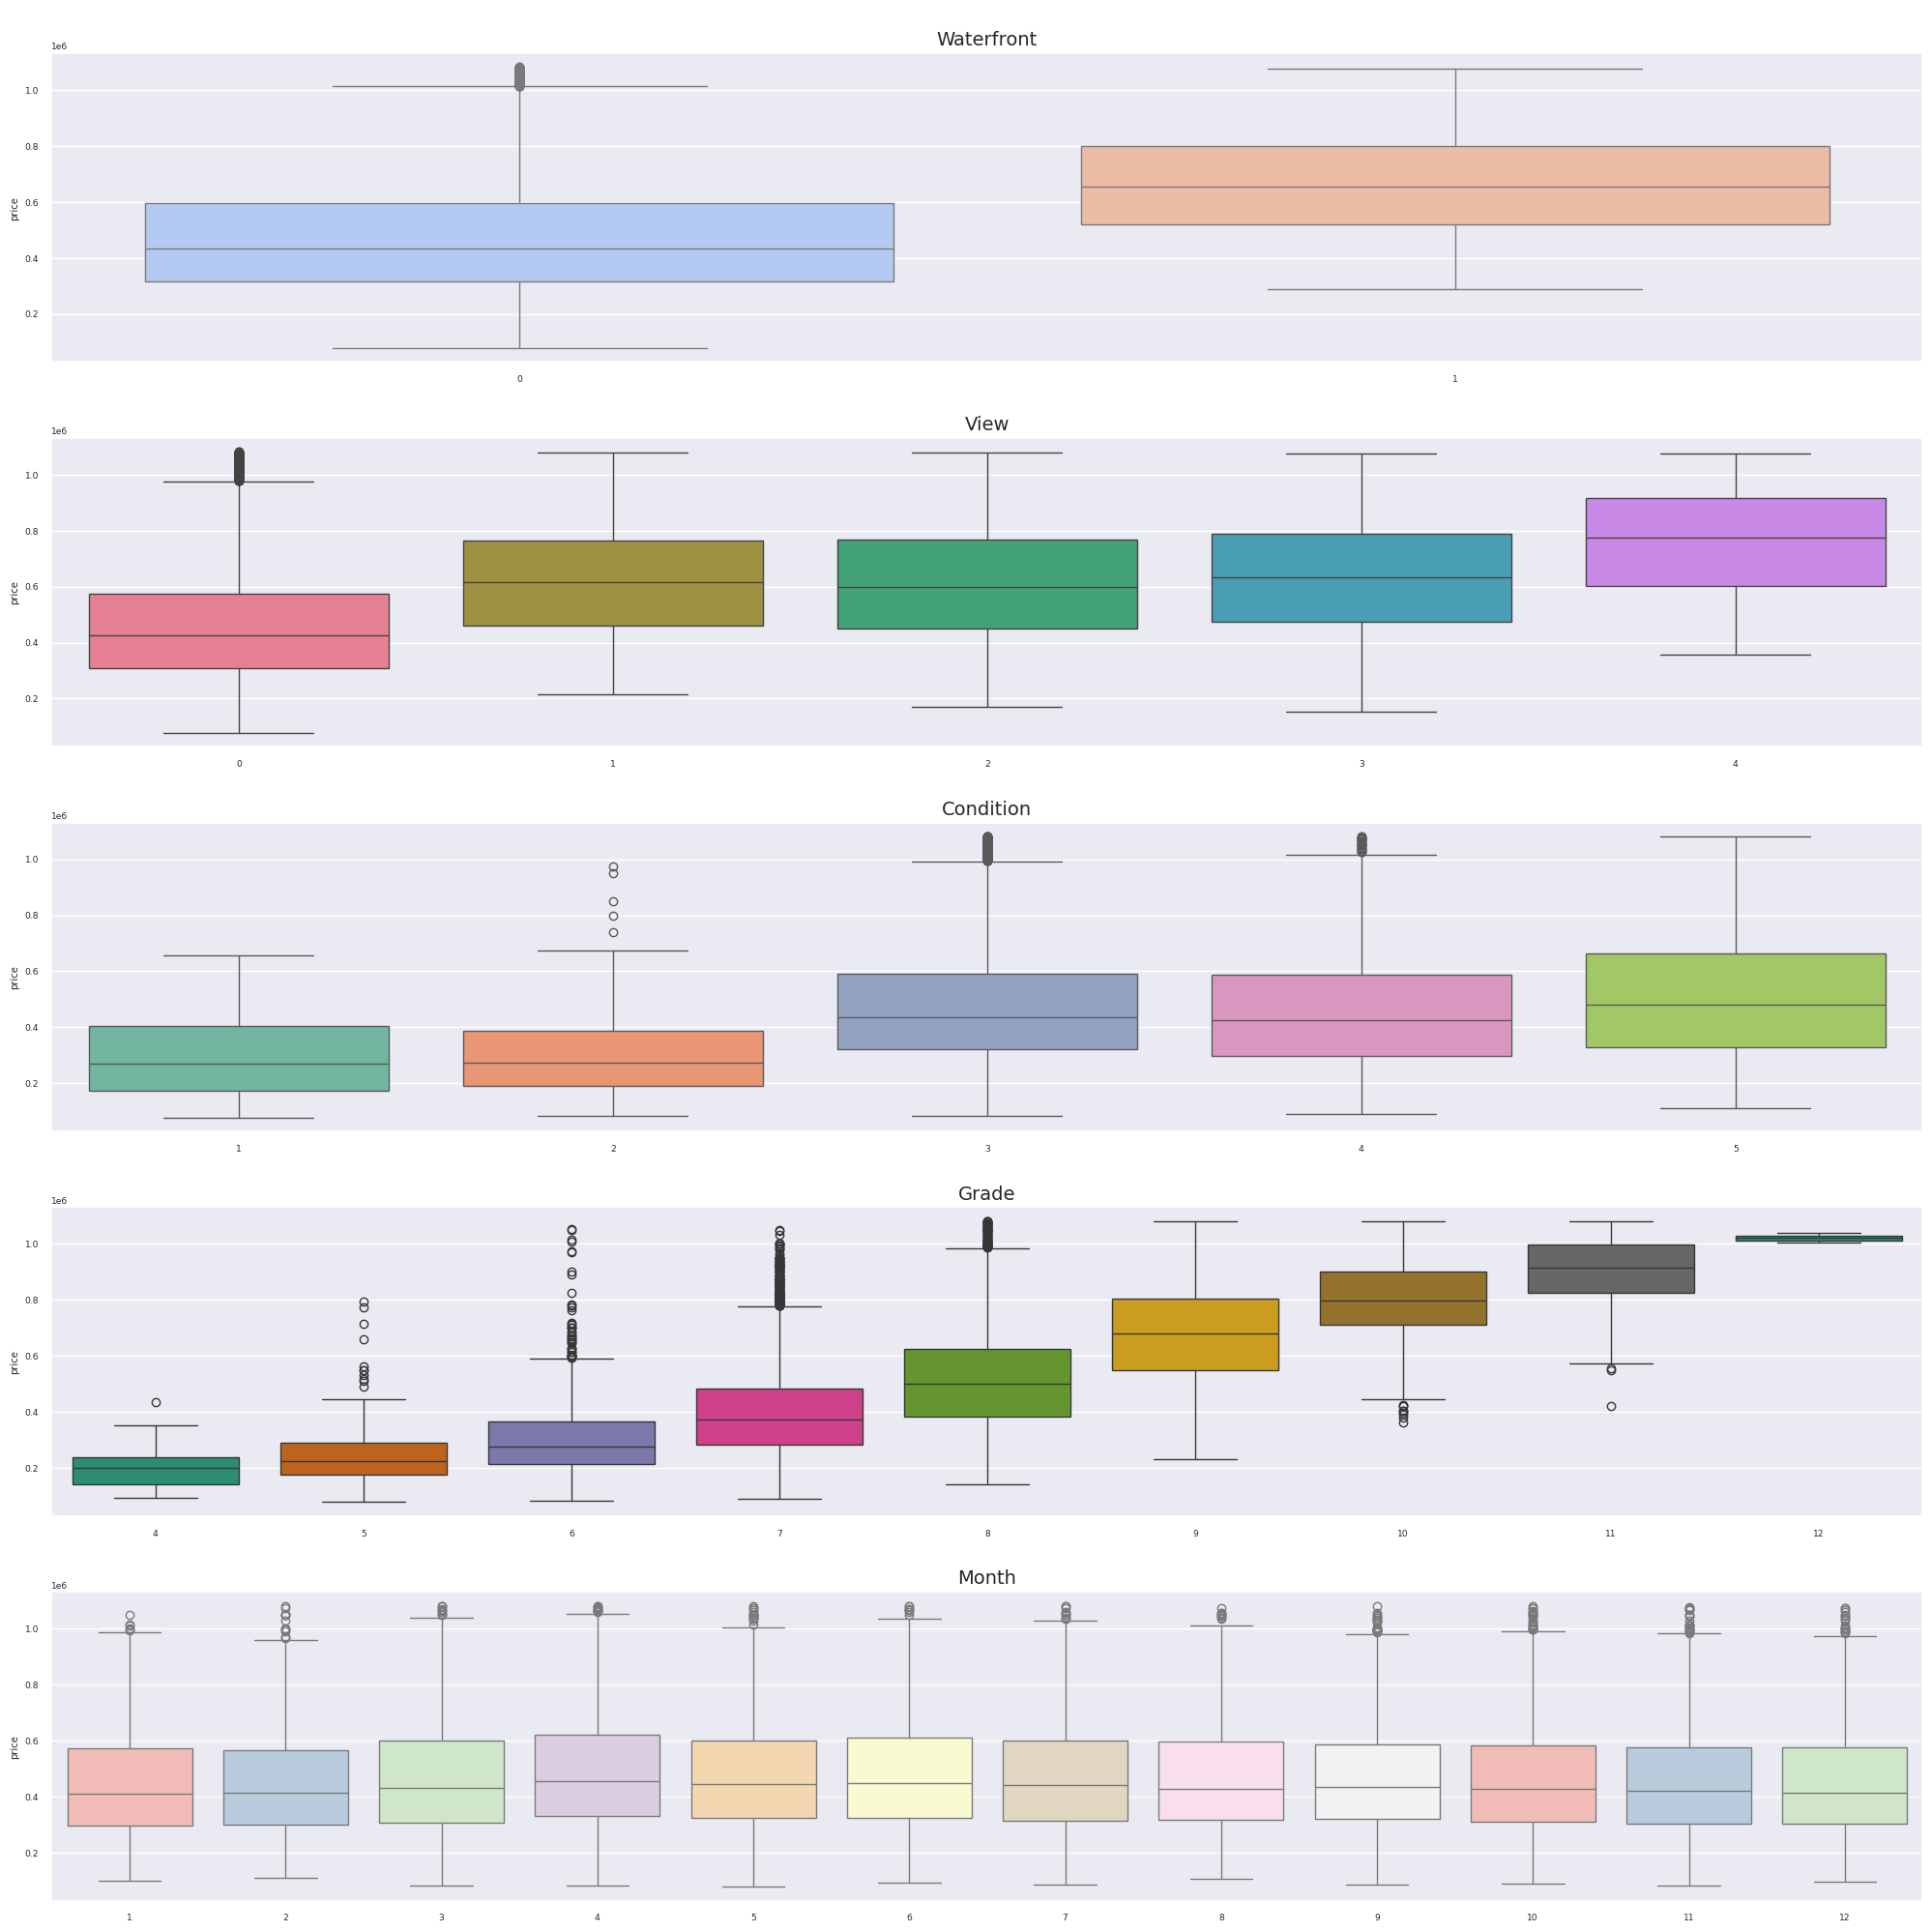

In [140]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 1, figsize=(20, 20))

df_cat=df_final[['waterfront','view','condition','grade','month','price']]

# Plot boxplots for each categorical variable
sb.boxplot(x="waterfront", y="price", data=df_cat, ax=axes[0], palette="coolwarm")
sb.boxplot(x="view", y="price", data=df_cat, ax=axes[1], palette="husl")
sb.boxplot(x="condition", y="price", data=df_cat, ax=axes[2], palette="Set2")
sb.boxplot(x="grade", y="price", data=df_cat, ax=axes[3], palette="Dark2")
sb.boxplot(x="month", y="price", data=df_cat, ax=axes[4], palette="Pastel1")

# Set titles for each subplot
axes[0].set_title('\nWaterfront', fontsize=14)
axes[1].set_title('\nView', fontsize=14)
axes[2].set_title('\nCondition', fontsize=14)
axes[3].set_title('\nGrade', fontsize=14)
axes[4].set_title('\nMonth', fontsize=14)

# # Set common x-axis label
# axes[-1].set_xlabel('Category', fontsize=14)
for ax in axes:
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


The different categories of the `month` column **do not** seem to have **distinct differences** between them. This suggests that month sold have weak relationship with `price`.

#### **Final Dataset**

Based on the analysis done above, all three new features do not have a significant relationship with house sale price.

* `building_age`: While the correlation is weak, the age of the building is a common predictor in real estate models as it often influences the sale price. Keeping this variable is reasonable, especially considering its potential significance in the context of house pricing.

* `yrs_since_renov`: Although this variable has weak correlation with house sale price, the presence of a renovation could still be valuable information. According the investopedia, remodelled houses can increase the return on investment (RIO) of the house.

    Link: https://www.investopedia.com/articles/mortgages-real-estate/08/add-value-to-real-estate.asp

* `month`: Boxplots did not reveal distinct differences between each category in this column in relation to sale price. This suggests that the month of sale may not have a substantial influence on house prices in your dataset. Furthermore, this dataset only contains data for 1 year which is not prove this variable might have any significance in predicting house sale price.  

Hence, only the `month` column will be removed.


In [142]:
df_final = df_final.drop(['month'], axis=1)
df_final.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,building_age,yrs_since_renov
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,63,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,28,0


In [143]:
print('Original dataset shape: ', rawData.shape)
print('Final dataset shape: ', df_final.shape)

Original dataset shape:  (21613, 21)
Final dataset shape:  (19693, 18)


---
# **Machine Learning**

### **Data Preprocessing**

**Data scaling** creates a fair playing field for all features in your dataset and allows your machine learning model to learn more effectively. Hence, both predictor and target variables were scaled.

In [144]:
#declare the predictor and target variables
X = df_final.drop(['price'], axis=1)
y = df_final['price']

#scaling the data
sc1=StandardScaler()
x_scaled = sc1.fit_transform(X)

sc2=StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(y.to_numpy().reshape(-1,1)))

#split scaled data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2)

### **Building Machine Learning Models**

#### **Model 1: Linear Regression**
Linear regression draws a straight line finds through a cloud of points representing house features (house size, bedrooms etc.) and their selling prices. This line by minimizing the distance between the data points and the line itself. It also captures the overall trend, allowing us to estimate the price of a new house based on its features, assuming they fall within the range of houses used to build the model.

Goodness of Fit of Linear Regression Model 	Train Dataset
Explained Variance (R^2) 	: 0.6883174494192085
Mean Squared Error (MSE) 	: 0.3121735209954498

Goodness of Fit of Linear Regression Model 	Test Dataset
Explained Variance (R^2) 	: 0.6856791183422369
Mean Squared Error (MSE) 	: 0.31229615301644337



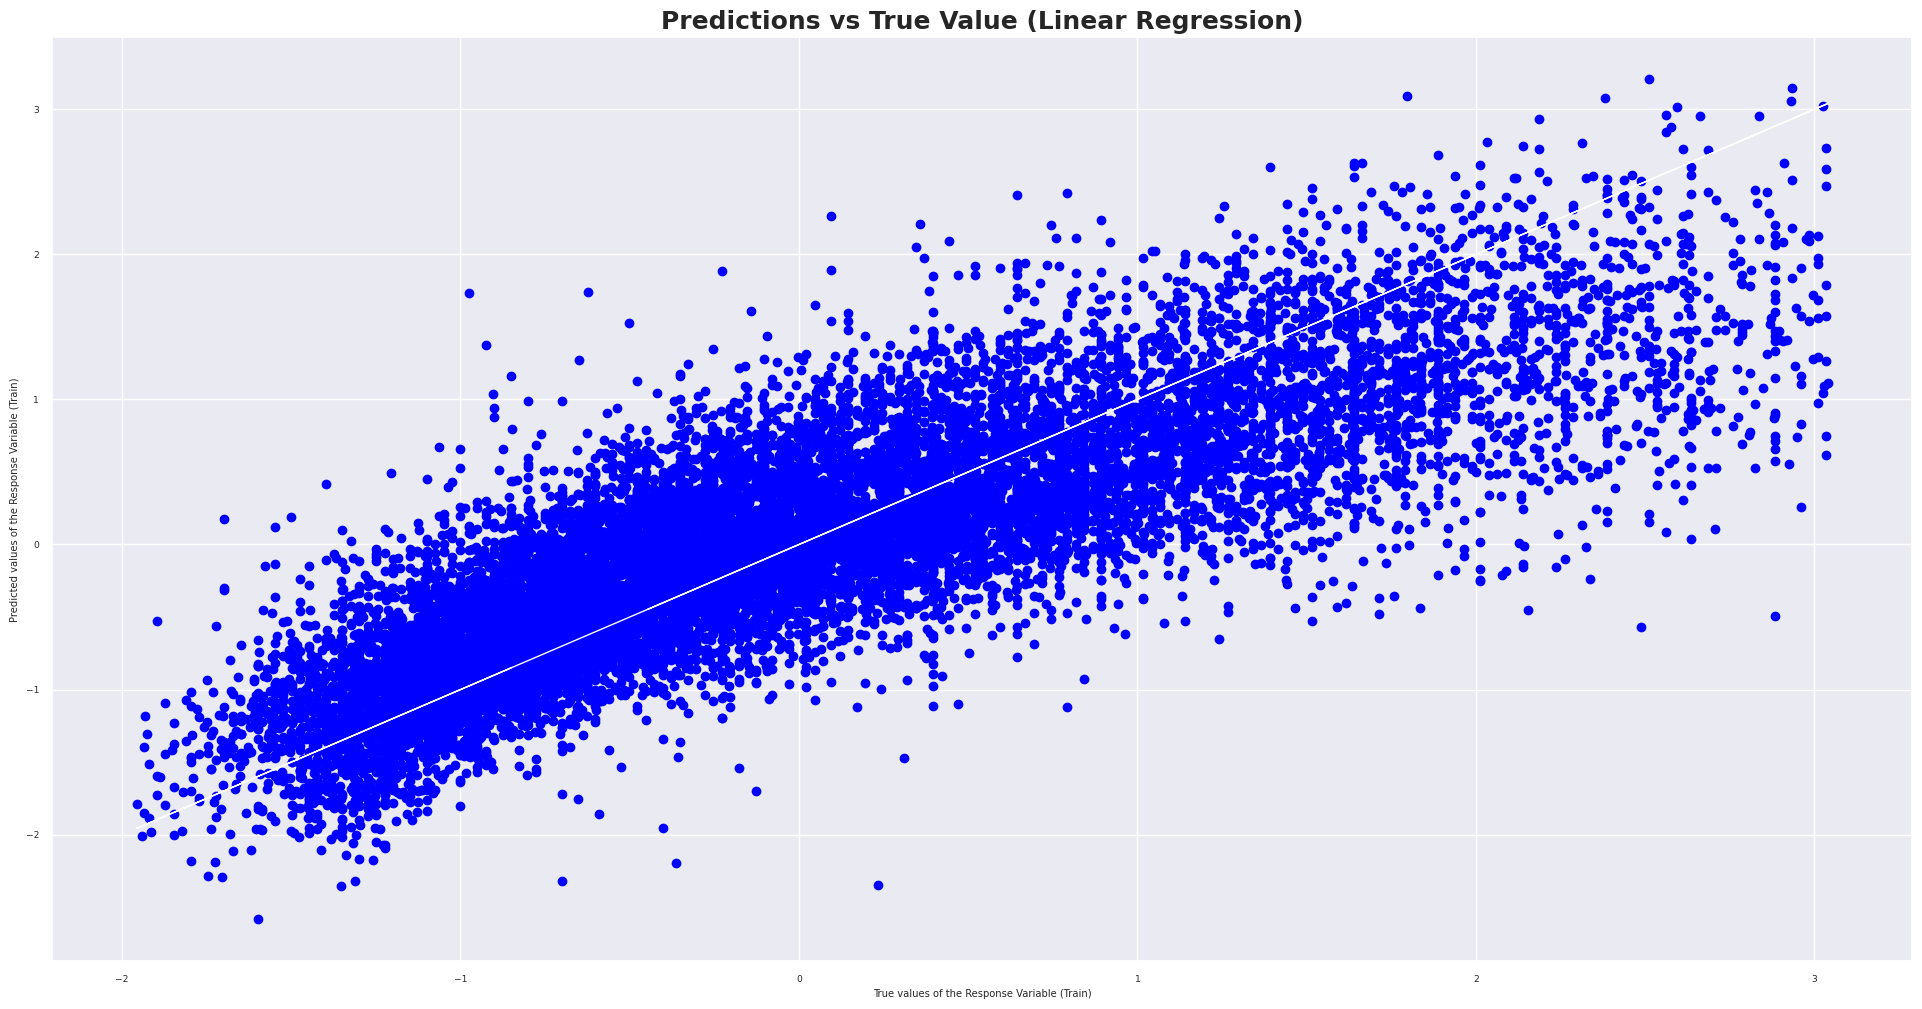

In [145]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Predict Total values corresponding to HP
y_train_linreg_pred = linreg.predict(X_train)
y_test_linreg_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Linear Regression Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_linreg_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Linear Regression Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_linreg_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_linreg_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_title("Predictions vs True Value (Linear Regression)", fontweight='bold', fontsize=18)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")

plt.show()

> The Linear Regression model gives a **training accuracy** score of `0.688` and **testing accuracy** score of `0.687`.

#### **Model 2: Support Vector Regressor (SVR)**

Unlike the straight line, SVR creates a "margin of error" around an ideal fit line. This creates a "tube" encompassing most data points with a certain allowed distance for outliers. SVR focuses on the data points closest to this tube's edges (support vectors) that define the margin. This approach is useful for capturing some non-linear relationships and slight variations in pricing that linear regression might miss. It can still predict prices for houses that don't perfectly fit the straight line.



Goodness of Fit of SVR Model 	Train Dataset
Explained Variance (R^2) 	: 0.8353673176698023
Mean Squared Error (MSE) 	: 0.16489201598926628

Goodness of Fit of SVR Model 	Test Dataset
Explained Variance (R^2) 	: 0.8065383205934115
Mean Squared Error (MSE) 	: 0.19221547711412096



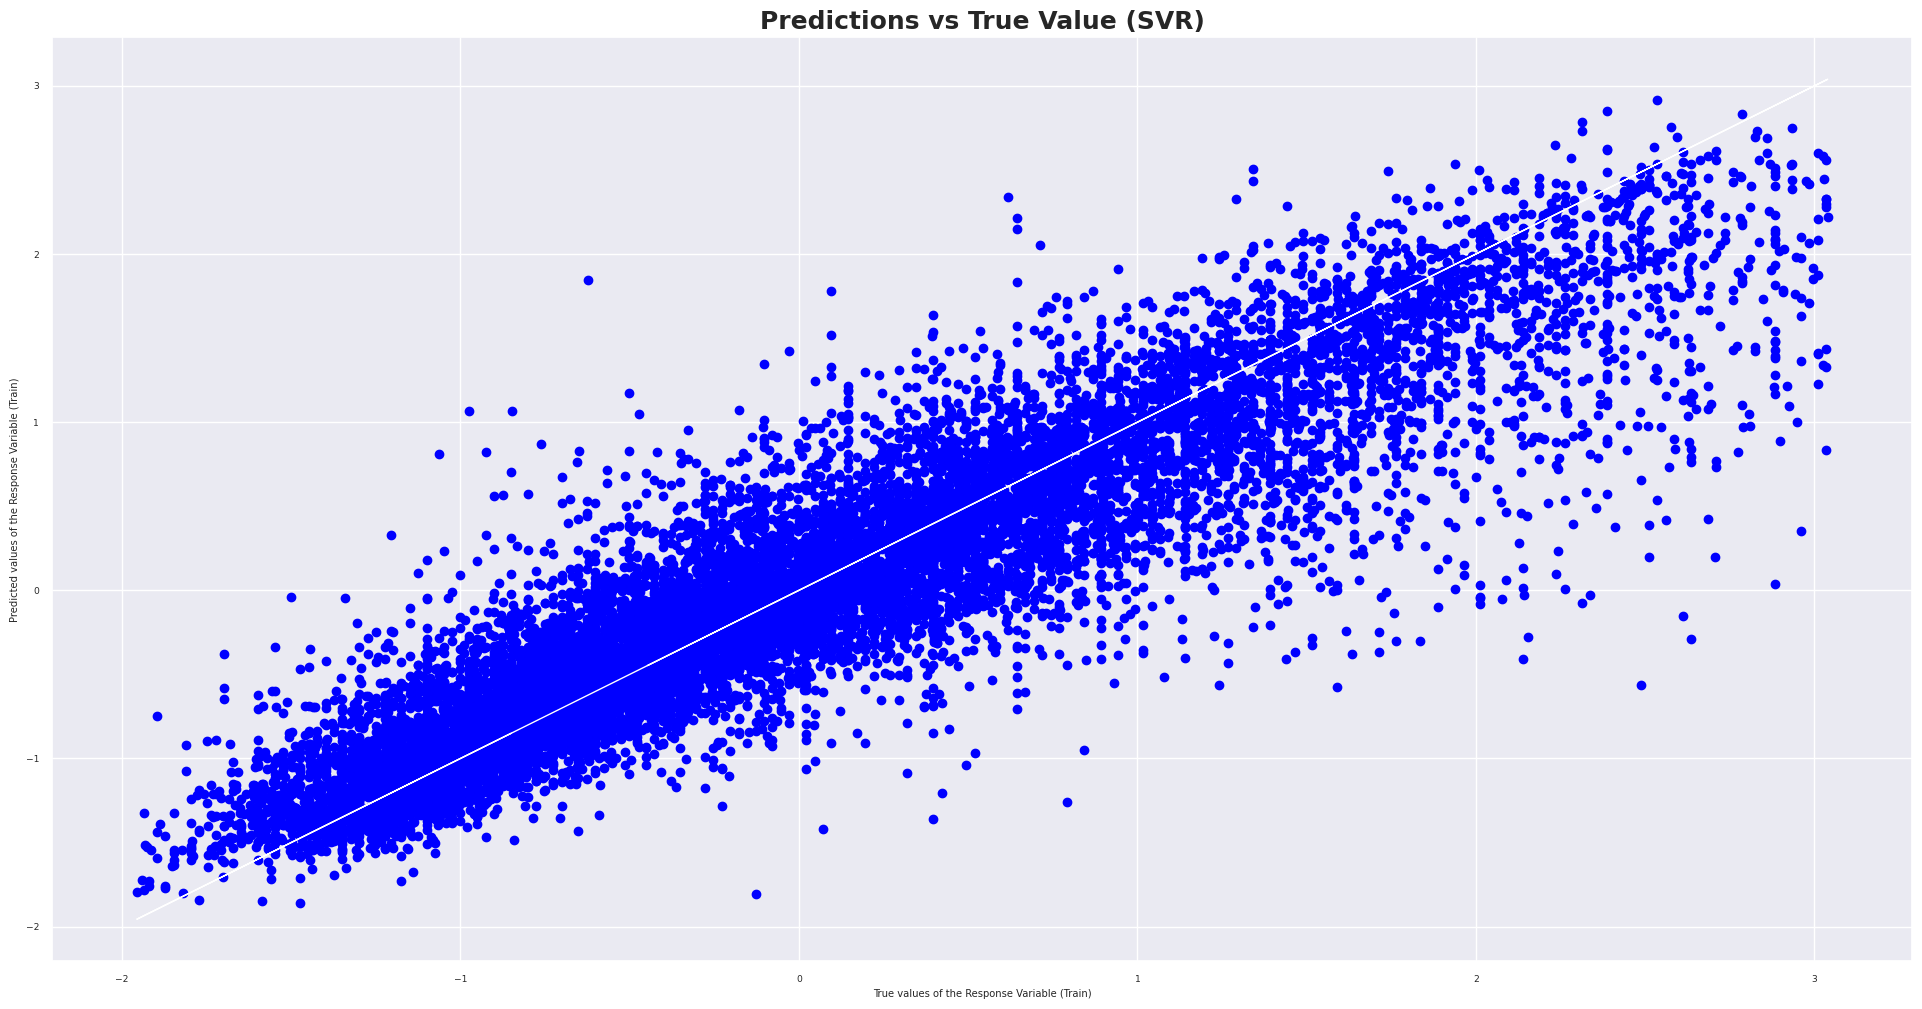

In [146]:
svrreg = SVR(kernel='rbf')
svrreg.fit(X_train,y_train)

# Predict Total values corresponding to HP
y_train_svrreg_pred = svrreg.predict(X_train)
y_test_svrreg_pred = svrreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of SVR Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", svrreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_svrreg_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of SVR Model \tTest Dataset")
print("Explained Variance (R^2) \t:", svrreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_svrreg_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_svrreg_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_title("Predictions vs True Value (SVR)", fontweight='bold', fontsize=18)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")

plt.show()

> The SVR model gives a **training accuracy** score of `0.835` and **testing accuracy** score of `0.807`.

#### **Model 3: Decision Tree Regressor**

 This model works like a series of yes-no questions to predict the house price. It starts by splitting the data based on a key feature (e.g. sqft_living > 2000 sqft).  At each split, it asks a question about another feature and further divides the data into more refined groups.  By following this decision tree, we can reach a final group (leaf) with a predicted average price range for houses with similar characteristics.

Goodness of Fit of Decision Tree Model 	Train Dataset
Explained Variance (R^2) 	: 0.9997553612447665
Mean Squared Error (MSE) 	: 0.0002450241165278173

Goodness of Fit of Decision Tree Model 	Test Dataset
Explained Variance (R^2) 	: 0.7021990660367847
Mean Squared Error (MSE) 	: 0.2958826201775483



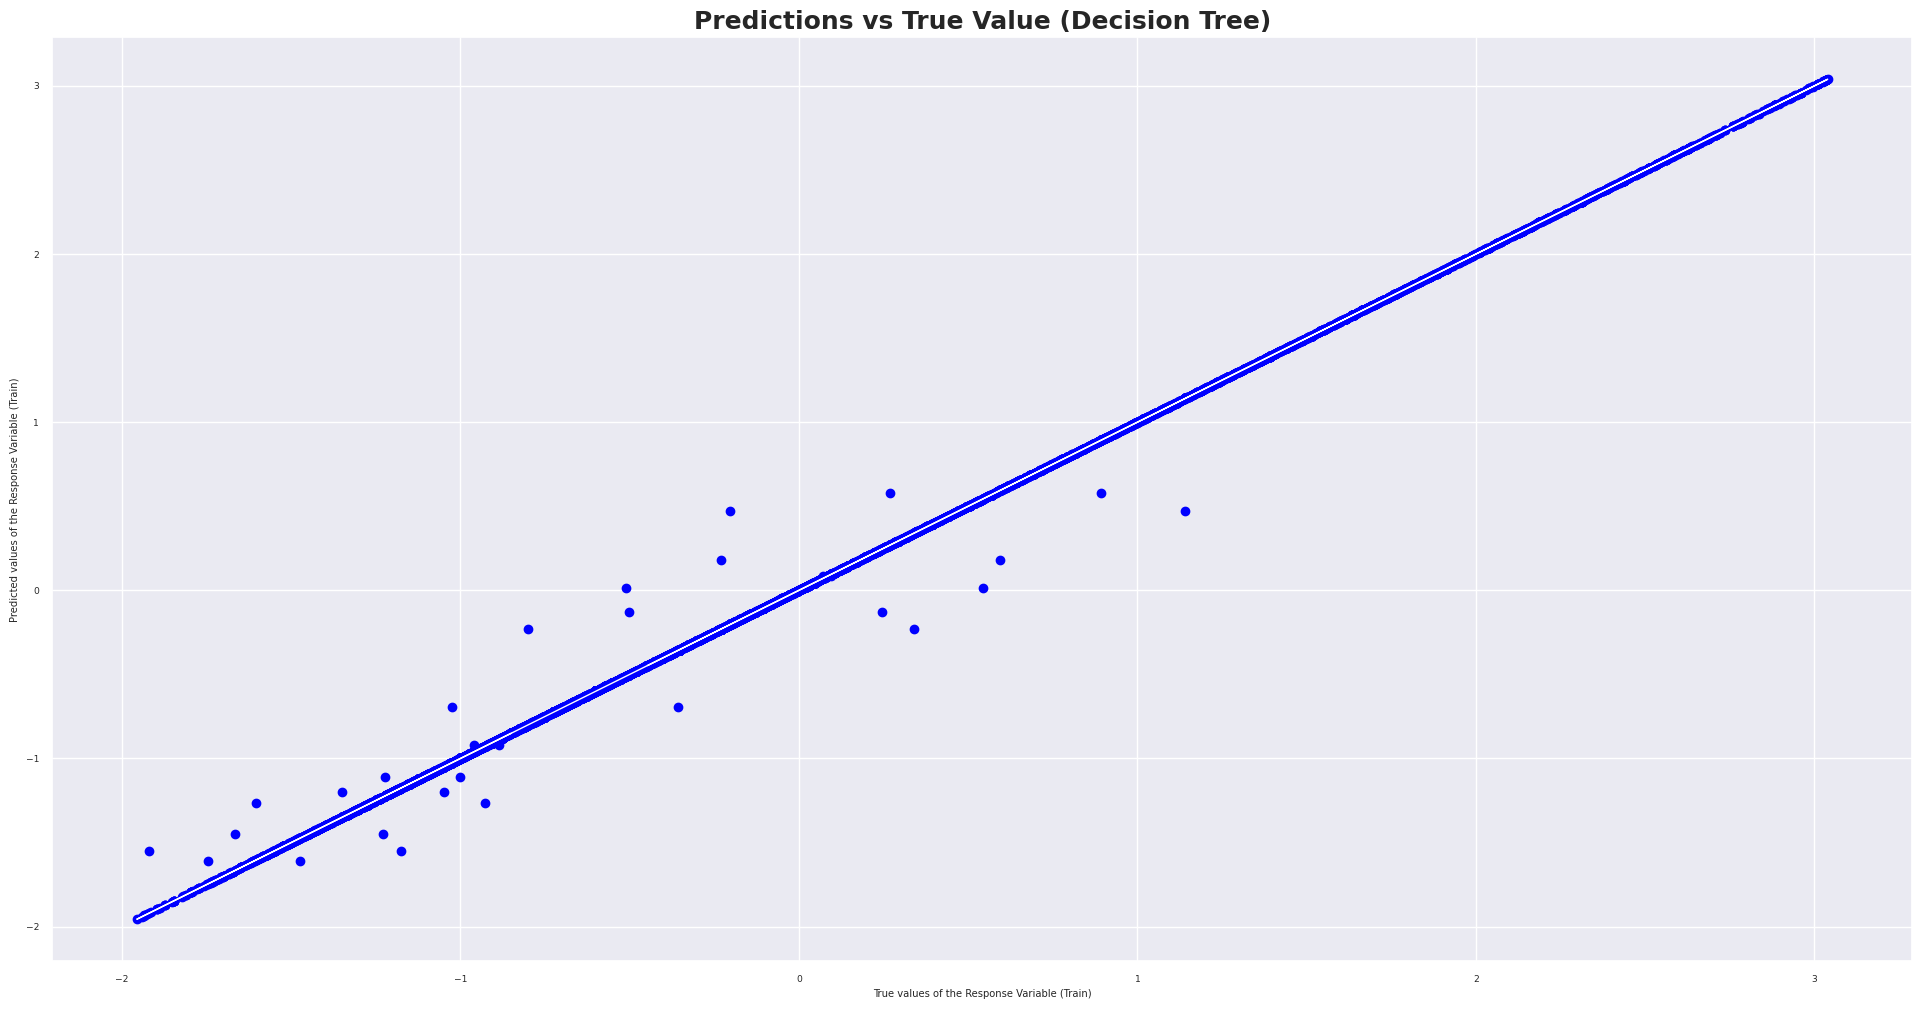

In [147]:
treereg = DecisionTreeRegressor(random_state=0)
treereg.fit(X_train,y_train)

# Predict Total values corresponding to HP
y_train_treereg_pred = treereg.predict(X_train)
y_test_treereg_pred = treereg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Decision Tree Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", treereg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_treereg_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Decision Tree Model \tTest Dataset")
print("Explained Variance (R^2) \t:", treereg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_treereg_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_treereg_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_title("Predictions vs True Value (Decision Tree)", fontweight='bold', fontsize=18)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")

plt.show()

> The Decision Tree Regressor model gives a **training accuracy** score of `0.999` and **testing accuracy** score of `0.702`. This model seems to be **too overfitted** as the training error is much lower than testing error.

#### **Model 4: Random Forest Regressor**

This model consists of a whole forest of decision trees, each trained on a slightly different subset of data and with random variations in the questions asked at each split. It combines the predictions of all these individual trees. By averaging the predictions from this "forest", it aims to improve accuracy and reduce the chance of overfitting to any specific trend in the data, leading to more robust predictions.

Goodness of Fit of Random Forest Model 	Train Dataset
Explained Variance (R^2) 	: 0.9715596021442444
Mean Squared Error (MSE) 	: 0.028485197906006246

Goodness of Fit of Random Forest Model 	Test Dataset
Explained Variance (R^2) 	: 0.8372896052882497
Mean Squared Error (MSE) 	: 0.16166227982140075



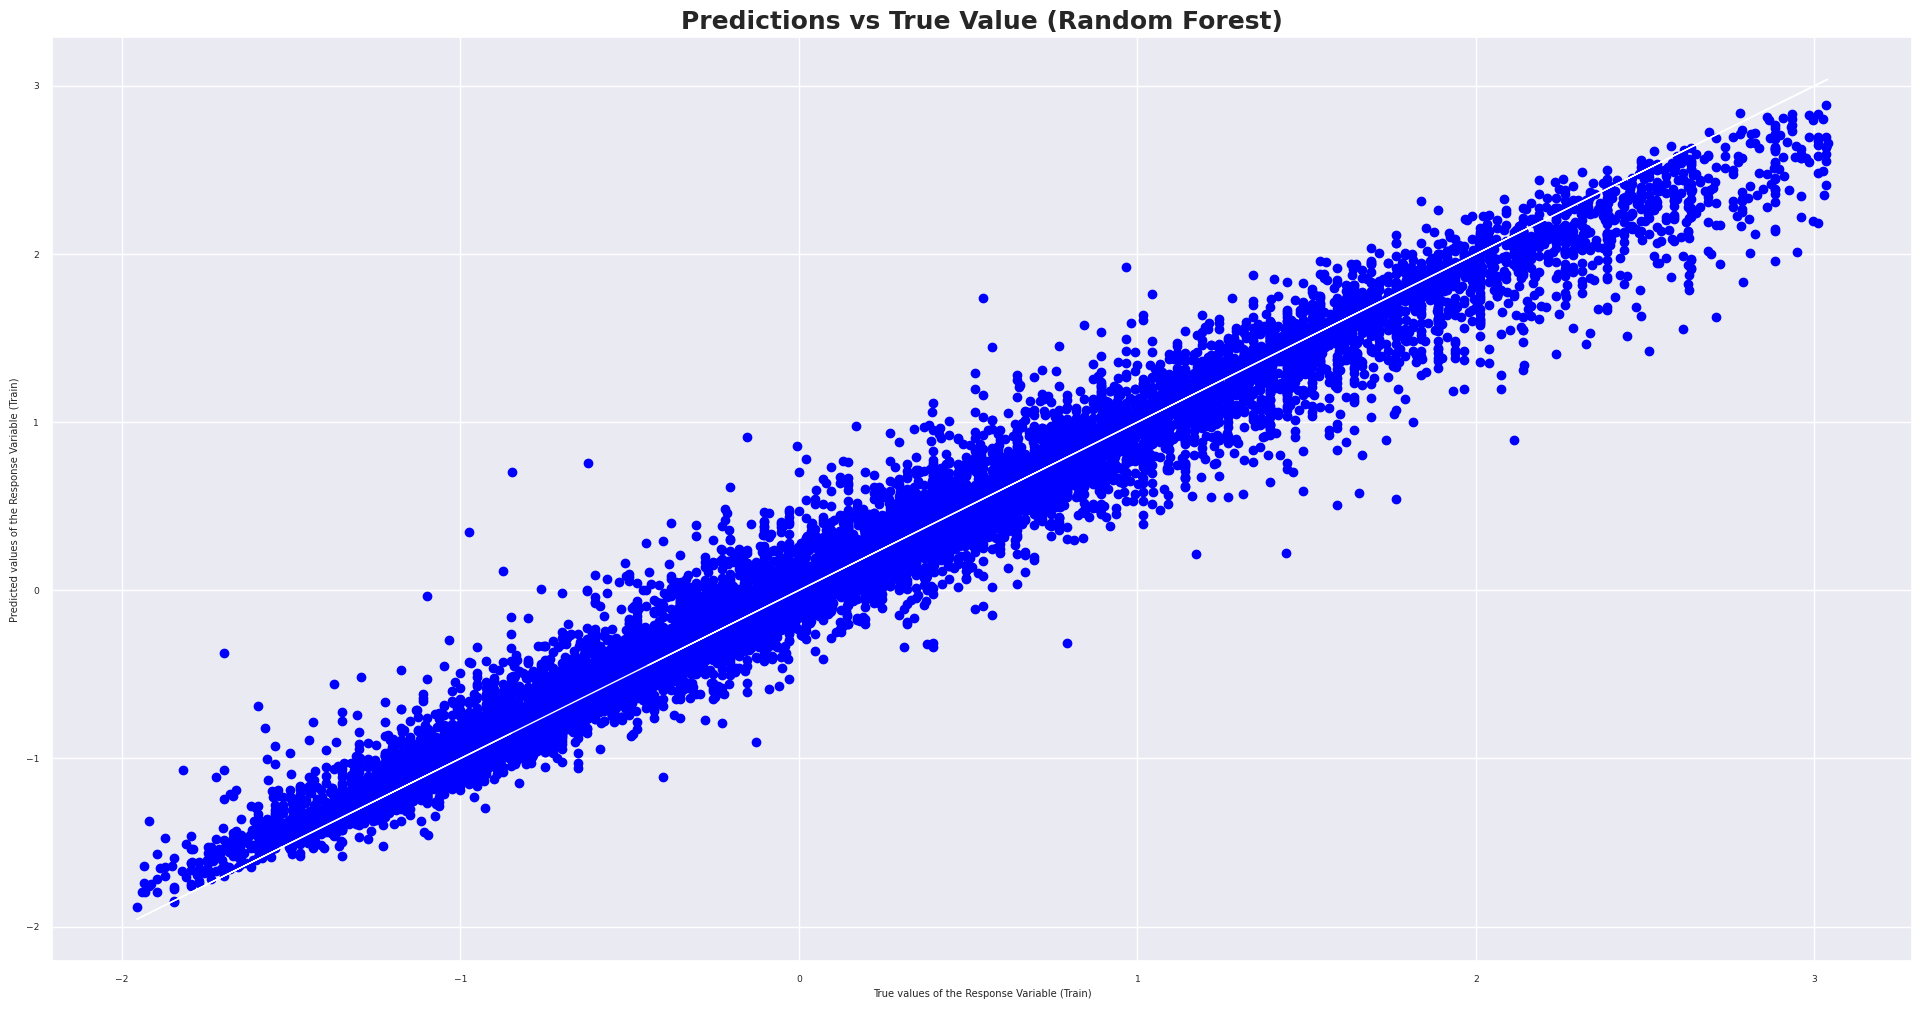

In [148]:
forestreg=RandomForestRegressor(n_estimators = 10,random_state=0)
forestreg.fit(X_train,y_train)

# Predict Total values corresponding to HP
y_train_forestreg_pred = forestreg.predict(X_train)
y_test_forestreg_pred = forestreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Random Forest Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", forestreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_forestreg_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Random Forest Model \tTest Dataset")
print("Explained Variance (R^2) \t:", forestreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_forestreg_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_forestreg_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_title("Predictions vs True Value (Random Forest)", fontweight='bold', fontsize=18)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")

plt.show()

> The Random Forest Regressor model gives a **training accuracy** score of `0.972` and **testing accuracy** score of `0.837`.

### **Evaluation of Regression Models**

Various metrices were used to evaluate the performance of all four machine learning models. The metrices used are as follows:

* `R-squared (R²)`: Tells how well the regression line fits the data, with a value closer to 1 indicating a better fit.   
* `Mean Squared Error (MSE)`: Measures the average squared difference between predicted and actual house prices.   
* `Mean Absolute Percentage Error (MAPE)`: Expresses the average difference between predicted and actual prices as a percentage of the actual price, making it useful for interpreting errors relative to the house price scale.

In [149]:
#r2 score of all models
r2_linreg = linreg.score(X_test, y_test)
r2_svrreg = svrreg.score(X_test, y_test)
r2_treereg = treereg.score(X_test, y_test)
r2_forestreg = forestreg.score(X_test, y_test)

#mse of all models
mse_linreg = mean_squared_error(y_test, y_test_linreg_pred)
mse_svrreg = mean_squared_error(y_test, y_test_svrreg_pred)
mse_treereg = mean_squared_error(y_test, y_test_treereg_pred)
mse_forestreg = mean_squared_error(y_test, y_test_forestreg_pred)

#function to calc MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_linreg = round(mean_absolute_percentage_error(y_test, y_test_linreg_pred),4)
mape_svrreg = round(mean_absolute_percentage_error(y_test, y_test_svrreg_pred),4)
mape_treereg = round(mean_absolute_percentage_error(y_test, y_test_treereg_pred),4)
mape_forestreg = round(mean_absolute_percentage_error(y_test, y_test_forestreg_pred),4)

#print statistical summary
d = {'Accuracy (R² score)':[round(r2_linreg,4), round(r2_svrreg,4), round(r2_treereg,4), round(r2_forestreg,4)],
     'MSE':[round(mse_linreg,4), round(mse_svrreg,4), round(mse_treereg,4), round(mse_forestreg,4)],
     'MAPE':[mape_linreg, mape_svrreg, mape_treereg, mape_forestreg]}
stats_summary = pd.DataFrame(data=d, index=['Linear Regression', 'SVR', 'Decision Tree','Random Forest'])
stats_summary

,Accuracy (R² score),MSE,MAPE
Linear Regression,0.6857,0.3123,190.6341
SVR,0.8065,0.1922,142.2530
Decision Tree,0.7022,0.2959,198.1190
Random Forest,0.8373,0.1617,150.8272


From the statistical summary on the performances of all four models above, **SVR** and **Random Forest** seem to be the better models with higher accuracy score while having lower error scores for MSE and MAPE. Hence, further analysis will be done on these two models.

### **Checking for Overfitting (Best 2 Models)**

Checking for overfitting is crucial because it ensures your model performs well on unseen data. An overfit model memorizes the training data too closely, including noise and random variations. This makes it great at predicting the specific houses it saw during training but performs poorly when encountering new houses with slightly different features. Thus, this is an essential test to ensure the model performs just as well on unseen data.

In [150]:
# mse for training set
mse_svrreg_train = mean_squared_error(y_train, y_train_svrreg_pred)
mse_forestreg_train = mean_squared_error(y_train, y_train_forestreg_pred)

# creating dataframe for the compiled statistics
d = {'Training Error':[round(mse_svrreg_train,4), round(mse_forestreg_train,4)],
     'Testing Error':[round(mse_svrreg,4), round(mse_forestreg,4)]}

overfit_check = pd.DataFrame(data=d, index=['SVR', 'Random Forest'])
overfit_check

,Training Error,Testing Error
SVR,0.1649,0.1922
Random Forest,0.0285,0.1617


From the insights above, both models seem to be slightly overfitted with Random Forest being slightly more than SVR.

### **Hyperparameter Tune Best Model**

**Hyperparameter tuning with validation** helps reduce overfitting by finding a model configuration that performs well on unseen data. The data is split into training and validation sets. The model is trained on the training data with different hyperparameter combinations. The performance of each configuration is evaluated on the validation set, which acts as a stand-in for unseen data. The hyperparameter combination that yields the best performance on the validation set is then chosen, as it's less likely to overfit to the specific details of the training data and likely generalizes better to new data.

In [214]:
# Split data into training, validation, and testing sets (common split: 80/10/10)
X_train, X_val_test, y_train, y_val_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Define hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']  # Added for overfitting control
}

# Create a RandomizedSearchCV object for Random Forest with validation set
rand_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist, cv=3, scoring='r2', n_iter=10)
rand_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best Random Forest Hyperparameters:", rand_search_rf.best_params_)

# Train the final Random Forest model with the best hyperparameters
best_model_rf = RandomForestRegressor(**rand_search_rf.best_params_)
best_model_rf.fit(X_train, y_train)

# Evaluate final Random Forest model on validation set
y_pred_val = best_model_rf.predict(X_val)
val_r2 = r2_score(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)

print("Random Forest Validation R^2:", val_r2)
print("Random Forest Validation MSE:", val_mse)

# Evaluate final Random Forest model on testing set (for reference)
y_pred_test = best_model_rf.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Random Forest Testing R^2:", test_r2)
print("Random Forest Testing MSE:", test_mse)


Best Random Forest Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Random Forest Validation R^2: 0.8601277709708591
Random Forest Validation MSE: 0.1413202805066497
Random Forest Testing R^2: 0.8719670019660043
Random Forest Testing MSE: 0.12701358191889106


Based on the above results, model has **high accuracy score** of `0.86` and `0.87` on validation and testing sets respectively. In addition, model also has low mean squared error of `0.14` and `0.13` on validation and testing sets respectively.

The close proximity between the validation and testing set metrics (R-squared and MSE) suggests that the model has generalised well avoiding significant overfitting. Thus, Given the good performance on both validation and testing sets, the Random Forest Regressor model can be used to predict the house sale price in King County effectively.

---
# **Insights & Recommendations**

### **Most Important Feature To Predict House Sale Price**

In [153]:
#important feature with forest
X2=df_final.drop(['price'], axis=1)
X1=pd.DataFrame(X)
X1.columns=X2.columns
importance = best_model.feature_importances_
importance = pd.DataFrame(importance)
importance = importance.nlargest(10, 0)
feature=importance.index
for i in range(0,10):
    print(f'Feature {i+1}: {X1.columns[feature[i]]}, Score: {importance[0].iloc[i]:.4f}')

Feature 1: lat, Score: 0.4210
Feature 2: sqft_living, Score: 0.3278
Feature 3: grade, Score: 0.0624
Feature 4: long, Score: 0.0527
Feature 5: sqft_living15, Score: 0.0346
Feature 6: sqft_lot, Score: 0.0203
Feature 7: building_age, Score: 0.0198
Feature 8: sqft_above, Score: 0.0166
Feature 9: sqft_lot15, Score: 0.0147
Feature 10: view, Score: 0.0115


The above list shows the **top 10 features** that played a significant role to predict the house sale price using our trained best model. The **location, house size, house architecture and building age** are some of the important factors to predicting house sale price.

### **The Expected House Sale Price Based On Requirements Given**

Now that we have our best trained model, prediction for house sale price in King County can be done. The specific requirements given by Lucas on the type of house he was looking for are as follows:

**GENERAL REQUIREMENTS**
> * *`Number of bedrooms:`* at least 5
* *`Number of bathrooms:`* at least 4
* *`Number of floors:`* 2
* *`Need view?:`* do not matter
* *`Need waterfront?:`* do not matter
* *`House condition rate:`* 4 or 5
* *`House construction grade:`* at least 10
* *`Building age:`* 15-20 years old
* *`Years since renovated:`* max 5





**LOCATION REQUIREMENTS**

Generally, hoping for the least priced option based on requirements above. Hence, preferably Southwest side of King County.

> * *`Latitude:`* 47.25 to 47.4
* *`Longitude:`* -122.4 to -122.25


**HOUSE SIZE/MEASUREMENTS PREFERRED**


> * *`Land space size (sqft_lot):`* at least average
* *`Living space size (sqft_living):`* above average
* *`Above ground floor size (sqft_above):`* at least average
* *`Basement size (sqft_basement):`* at least average
* *`Average land space of nearest 15 houses (sqft_lot15):`* at least average
* *`Average living space of nearest 15 houses (sqft_living15):`* above average



In [177]:
# Reasonable price based on their requirements
med_sqft_lot = df_final['sqft_lot'].median()
med_sqft_above = df_final['sqft_above'].median()
med_sqft_basement = df_final['sqft_basement'].median()
med_sqft_lot15 = df_final['sqft_lot15'].median()
highavg_sqft_living = df_final['sqft_living'].quantile(0.75)
highavg_sqft_living15 = df_final['sqft_living15'].quantile(0.75)

data = {
    'bedrooms': [5],
    'bathrooms': [4],
    'sqft_living': [highavg_sqft_living],
    'sqft_lot': [med_sqft_lot],
    'floors': [2],
    'waterfront': [0],
    'view': [0],
    'condition': [4],
    'grade': [10],
    'sqft_above': [med_sqft_above],
    'sqft_basement': [med_sqft_basement],
    'lat': [47.325],
    'long': [-122.325],
    'sqft_living15': [highavg_sqft_living15],
    'sqft_lot15': [med_sqft_lot15],
    'building_age': [20],
    'yrs_since_renov': [5]
}

# Create a DataFrame using the dictionary
df_test_min = pd.DataFrame(data)

# Display the DataFrame
df_test_min


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,building_age,yrs_since_renov
0,5,4,2400.0,7500.0,2,0,0,4,10,1510.0,0.0,47.325,-122.325,2260.0,7532.0,20,5


In [180]:
# Scale the test data
X_test_scaled = sc1.transform(df_test_min)

# Make predictions using the trained model
predictions = best_model.predict(X_test_scaled)

# Inverse scale the predictions
unscaled_predictions = sc2.inverse_transform(predictions.reshape(-1, 1))

# Convert unscaled predictions to 1D array
unscaled_predictions = unscaled_predictions.ravel()

# Print actual predicted values
print(f'Expected House Sale Price: ${round(unscaled_predictions[0],2)}')


Expected House Sale Price: $389225.69


---
**EVALUATION SUMMARY**

Based on the analysis done, Lucas and his family could consider looking for houses in the **Southern part of King County** so as to find cheaper housing options. He could expect a housing price of **more or less around $389225.69** there. Lucas should take note that the **location, house size and house architecture conditions** are some of the key factors that affect house sale price in King County. Thus, if he wants to explore more expensive or cheaper options, he should vary his preferences for these factors.
